# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
#Подключение библеотеки 
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

In [2]:
# Считываються файлы

pth1 = '/datasets/users_behavior.csv'
pth2 = 'users_behavior.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Incorrect file path')
    
# Информация даттафрейма и первые 5 строки 
display(df.info())
display(df.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Как видно из Info :
- Колличество звонков имеют значение Float можно превратить в Int
- минуты так же можно превратить в int 
- Колличество смс имеют значение Float можно превратить в Int
- Колличество мегабайт так же можно из Float в Int так как байты не так интересны


In [3]:
df = df.astype('int') # Преобразование в целочисленное значения всех данных
display(df.head()) # проверка
df.drop('is_ultra',axis=1).describe()

,calls,minutes,messages,mb_used,is_ultra
0,40,311,83,19915,0
1,85,516,56,22696,0
2,77,467,86,21060,0
3,106,745,81,8437,1
4,66,418,1,14502,0


,calls,minutes,messages,mb_used
count,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,437.717797,38.281269,17207.186683
std,33.236368,234.559661,36.148326,7570.972211
min,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.000000,9.000000,12491.250000
50%,62.000000,430.000000,30.000000,16943.000000
75%,82.000000,571.750000,57.000000,21424.000000
max,244.000000,1632.000000,224.000000,49745.000000


In [4]:
display(df[df['minutes']==0])  
#df[df['mb_used']==0]['mb_used'].count()
#df[df['calls']==0]['calls'].count()

,calls,minutes,messages,mb_used,is_ultra
54,0,0,33,14010,1
247,0,0,35,16444,1
264,0,0,21,19559,0
351,0,0,8,35525,1
390,0,0,25,19088,1
484,0,0,191,32448,1
551,0,0,24,18701,1
647,0,0,30,10236,1
769,0,0,32,17206,0
884,0,0,180,32045,1


<AxesSubplot:>

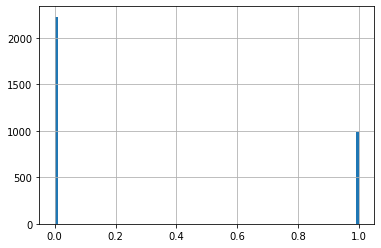

In [5]:
df['is_ultra'].hist(bins=100) # расбалансировка

### Вывод
В данном пункте было сделано :
- Считывание файла 
- Преобразования всех столбцов в целочисленный тип(т.к. значения секунд и байты не являються важными значениями (как мне кажется) так же колличество смс не может быть с плавающейточкой)
- Было проанализировано, что Люди не используют звонки, но при этом используют интернет и используют ультра, но также есть данные где есть один звонок и 0 минкт строка 3074 (странно) и странная строка 3107
Для обучения модели не понятно влияет ли эти 0 значения и можно ли их убрать, или использовать какойто фильтр, так как данные 0 значения могут сказаться на модели.


## Разбейте данные на выборки

In [6]:
# Деление датафрейма на  тренировочную, валидационную и тестовую выборку 
train_valid, test = train_test_split(df, test_size=0.25)
train, valid = train_test_split(train_valid, test_size=0.25)

features_train = train.drop(['is_ultra'], axis=1)
target_train = train['is_ultra']

features_valid = valid.drop(['is_ultra'], axis=1)
target_valid = valid['is_ultra']

features_test = test.drop(['is_ultra'], axis=1)
target_test = test['is_ultra']

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)


(1807, 4)
(603, 4)
(804, 4)


## Исследуйте модели

### Модель решающее дерево

Лучшие значения по решающему дереву
Процент правильных ответов 81.426% , при глубине дерева  = 6
CPU times: user 56.3 ms, sys: 4.11 ms, total: 60.4 ms
Wall time: 65.3 ms


<function matplotlib.pyplot.show(close=None, block=None)>

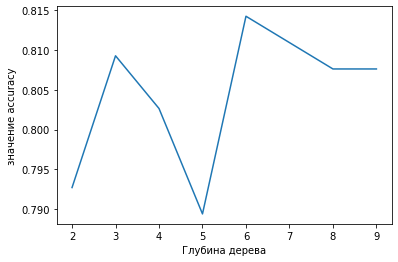

In [7]:
%%time
# Задаються нулевые значения для лучшего значения метрики accuracy и глубины дерева
best_accuracy_tree, dept_best =0,0
accur,dep = [],[]

for depth in range(2, 10):
    # определятся вид модели
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    
    # обучение модели
    model_tree.fit(features_train, target_train)
    #tree.plot_tree(model_tree)    
    # проверка на валид. выборке
    predictions_tree = model_tree.predict(features_valid)
    
    # Расчёт accuracy
    accuracy_tree = accuracy_score(target_valid, predictions_tree)
    accur.append(accuracy_tree)
    dep.append(depth)
    # Нахождение лучшей модели и запоминания глубины дерева 
    if accuracy_tree > best_accuracy_tree:
        best_model_tree = model_tree 
        best_accuracy_tree = accuracy_tree
        dept_best = depth
        
print('Лучшие значения по решающему дереву')    
print(f'Процент правильных ответов {round(best_accuracy_tree *100,3)}% , при глубине дерева  = {dept_best}')

plt.plot(dep,accur)
plt.xlabel('Глубина дерева')
plt.ylabel('значение accuracy')
plt.show

### Модель cлучайный лес

In [8]:
%%time
# Задаються нулевые значения для лучшего значения метрики accuracy, глубины дерева и колличества деревьев
best_accuracy_tree, dept_best, best_est =0,0,0

for depth in range(2, 10):
    for est in range(2, 10):
        # определятся вид модели
        model_forest = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        
        # обучение модели
        model_forest.fit(features_train, target_train)
        
        # проверка на валид. выборке
        predictions_forest = model_forest.predict(features_valid)
        
        # Расчёт accuracy
        accuracy_forest = accuracy_score(target_valid, predictions_forest)
        
        # Нахождение лучшей модели и запоминания глубины дерева и колличества деревьев
        if accuracy_forest > best_accuracy_tree:
            best_model_forest = model_forest # сохраните наилучшую модель
            best_accuracy_tree = accuracy_forest
            dept_best = depth
            best_est = est
print('Лучшие значения по случайному лесу')             
print(f'Процент правильных ответов {round(best_accuracy_tree *100,3)}%, при глубине дерева = {dept_best},колличество деревьев = {best_est}')  

Лучшие значения по случайному лесу
Процент правильных ответов 82.09%, при глубине дерева = 5,колличество деревьев = 7
CPU times: user 965 ms, sys: 12 ms, total: 976 ms
Wall time: 984 ms


### Модель логистическая регрессия

In [9]:
%%time
# определятся вид модели
model_lr = LogisticRegression(random_state=12345, solver='lbfgs')

# обучение модели
model_lr.fit(features_train, target_train)

# проверка на валид. выборке
predictions_lr = model_lr.predict(features_valid)

accuracy_lr = accuracy_score(target_valid, predictions_lr)
print('Лучшие значения по логической регресии')
print(f'Процент правильных ответов {round(accuracy_lr *100,3)}%')

Лучшие значения по логической регресии
Процент правильных ответов 70.481%
CPU times: user 12.6 ms, sys: 131 µs, total: 12.7 ms
Wall time: 11.6 ms


### Вывод
В данном пункте было сделаано :
- Использовано три модели машинного обучения решающее дерево, случайный лес и логическая регрессия   
Значения полученные при использовании модеи : 
|Модель      |  Глубина |  Кол-во Деревьев |  Процент правильных ответов  |  Затраченное время   |
| ---------  | -------- | -------------    | --------------------------   |--------     |
| Решающее дерево      |  7    | 1     |  81.924     | 62.5 мс    |
| Случайный лес        |  5    | 2     |  82.587      | 1.11 с     |
| Логическая регрессия |  -    | -     |  75.29      | 53.6 мс     |

Из таблицы видно то, что:
- наибольшее вемя затрачивает модель случайный лес, но при этом процент правильных ответов 
- наименьшее время затрачивает логическая регресия при этом наихудший процент ответов у данной модели
- Если выбирать оптимальное между правильностью ответов и временем являеться решающее дерево

## Проверьте модель на тестовой выборке

In [10]:
# Используеться наилучшая модель

train =  pd.concat([features_train,features_valid])
target = pd.concat([target_train,target_valid])

model_forest = RandomForestClassifier(random_state=12345, max_depth=dept_best, n_estimators=best_est)
        
# обучение модели
model_forest.fit(train, target)
        
# проверка на валид. выборке
predictions_forest_summa = model_forest.predict(features_test)

accuracy_forest_test_summa = accuracy_score(target_test, predictions_forest_summa)
print('Обучение модели при сумме валидационной и тренирвочной выборке')
print(f'Процент правильных ответов на тестовой выборке для случайного леса {round(accuracy_forest_test_summa*100,3)}%')
print('')

predictions_forest_test = best_model_forest.predict(features_test)
accuracy_forest_test = accuracy_score(target_test, predictions_forest_test)
print('При использовании только тренировачной выборке')
print(f'Процент правильных ответов на тестовой выборке для случайного леса {round(accuracy_forest_test*100,3)}%')
print('')
print('Метрики модели МО')
print(classification_report(target_test, predictions_forest_test))

#predictions_tree_test = best_model_tree.predict(features_test)
#accuracy_tree_test = accuracy_score(target_test, predictions_tree_test)
#print(f'Процент правильных ответов на тестовой выборке для решающего дерева {round(accuracy_tree_test,3)}%')


Обучение модели при сумме валидационной и тренирвочной выборке
Процент правильных ответов на тестовой выборке для случайного леса 80.846%

При использовании только тренировачной выборке
Процент правильных ответов на тестовой выборке для случайного леса 80.721%

Метрики модели МО
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       566
           1       0.79      0.47      0.59       238

    accuracy                           0.81       804
   macro avg       0.80      0.71      0.73       804
weighted avg       0.81      0.81      0.79       804



### Вывод
Из проверки модели на тестовой выборке можно сказать что в техническое задание вписываеться как и случайный лес так и решающее дерево, но точнее будет модель случайного леса 

## (бонус) Проверьте модели на адекватность

In [11]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_valid, target_valid)
random_answers = dummy_clf.predict(features_test)


accuracy_random_test = round(accuracy_score(target_test, random_answers), 3)
print(f'Процент правильных ответов на случайном массиве {round(accuracy_random_test*100,3)}%')

Процент правильных ответов на случайном массиве 70.4%


### Вывод
Обученная модель имеет больше правильных ответов, чем случайные предсказания (на 30 процентов )

## Вывод по проекту
В данном проекте были обученны: три вида модели машинного обучения (случайный лес, решающее дерево, логическая регресия)
- Наилучший результат по валидационной выборке показывает модель случайный лес, имеющий процент правильных ответов 83.6 процента
- по тестовой выборке случайный лес показывает значение 80.8 процента, тем самым подходит для заказчика для определения тарифа
- также обученная модель дает больше правильных ответов по сравнению с случайным предсказанием на 30 процентов   

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
